##  Install and Import Dependencies

In [2]:
!pip install easyocr
!pip install imutils
!pip install opencv-python

In [3]:
# import os

In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [5]:
# import opencv

In [6]:
# category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [7]:
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.02533422-940e-11eb-9dbd-5cf3709bbcc6.jpg')

## Read in Image, Grayscale and Blur

In [6]:
from PIL import Image

In [7]:
import tensorflow as tf

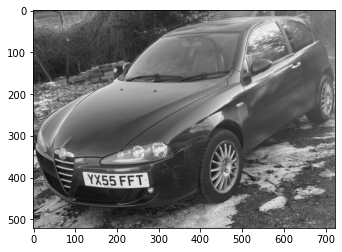

In [840]:
img = cv2.imread('img10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting color image to Gray color 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

##  Apply filter 

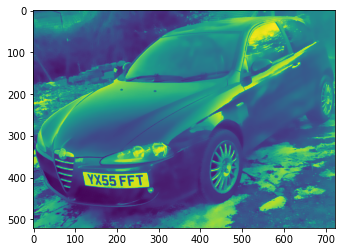

In [841]:
bfilter = cv2.bilateralFilter(gray, 15, 20, 20) #Noise reduction and blur image
plt.imshow(bfilter)

#  Find edges for localization

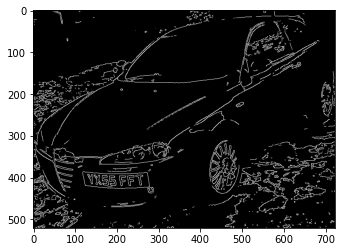

In [842]:
edged = cv2.Canny(bfilter, 170, 200) #Canny Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and Apply Mask

In [843]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Boundaries of objects
contours = imutils.grab_contours(keypoints) 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [844]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [845]:
# location

In [846]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

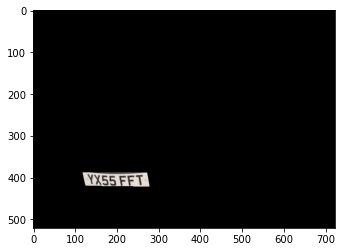

In [847]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

# Cropping Image

In [834]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

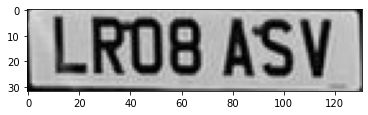

In [835]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR To Read Text

In [836]:
reader = easyocr.Reader(['en'])
# reader = easyocr.Reader(['en'], detection='DB', recognition = 'Transformer')
result = reader.readtext(cropped_image)
result #1st Bounding box co ordinates, 2nd Extracted Text, 3rd Text prediction confidence

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 0], [124, 0], [124, 32], [6, 32]], 'LROB ASV', 0.7890849275821298)]

In [837]:
# import os

In [838]:
num = result[0][1].replace(" ", "") #Removing the Spaces from the Result

char1 = num[0:1] #1st character
char2 = num[1:2] #2nd character
char3 = num[2:3] #3rd character
char4 = num[3:4] #4th character
char5 = num[4:5] #5th character
char6 = num[5:6] #6th character
char7 = num[6:7] #7th character

if char3.upper() == "O":
    char3 = "0"
if char3 == "I" or char3 == "L":
    char3 = "1"
if char3.upper() == "S":
    char3 = "5"
if char3 == "B":
    char3 = "8"
if char3 == "G":
    char3 = "9"
if char3 == "b":
    char3 = "6"
if char3.upper() == "Z":
    char3 = "7"
    
if char4 == "O":
    char4 = "0"
if char4 == "S":
    char4 = "5"
if char4 == "G":
    char4 = "9"
if char4 == "B":
    char4 = "8"
if char4 == "b":
    char4 = "6"
if char4 == "I" or char4 == "L":
    char4 = "1"
if char4.upper() == "Z":
    char4 = "7"
    
text = (char1+char2+char3+char4+char5+char6+char7).upper() #Concatenate all the characters with uppercase
text

'LR08ASV'

##  Render Result 

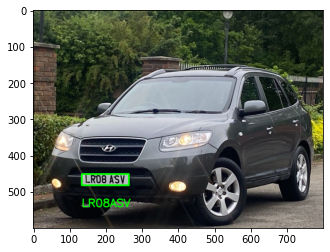

In [839]:
# text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX #Font
# Font Style, Thickness, Font color green
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
# Image where Rectangle is to be drawn, Starting point coordinates, Ending point coordinates, Green color, Thickness
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [696]:
print(text)

WR12GBY


In [586]:
# from PIL import Image
# import pytesseract
# df = pytesseract.image_to_data(Image.open('img.png'),lang='eng',output_type='data.frame')

##  Saving the Extracted text in txt file

In [578]:
file = open("extraction.txt", "w")

In [579]:
# print(result[0][1].readlines())

In [580]:
file.write(text)
file.close()